<a href="https://colab.research.google.com/github/ScionOfHeavens/FOUNDER_TASKS/blob/master/Practice3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Сжатие данных с помощью автокодировщиков: сравнительный анализ методов.


## О себе

Закончил БФУ Им. Канта направления "Прикладная математика и информатика". Большую часть времени проработал преподовоателем/репетитором иматематики/информатики/программирования. Уже как пол года стажа в качестве программиста в одной игровой компании, создающей казуальные игры.

## Аннотация

В этой работе влияние архитектуры на сжатие данных. Задача №3 из предложенных.
Рассматривается задача уменьшения размерности исходных массивов данных для улучшения эффективности
обработки трафика мобильных приложений. Актуальность исследования обусловлена необходимостью оптимизации объемов передаваемых и хранимых данных при работе в условиях ограниченных вычислительных
ресурсов, а также повышения скорости и качества аналитических операций. Для решения поставленной задачи
применяются многослойные автокодировщики, способные формировать компактные представления исходных
данных с минимальными потерями в их информативности. Подход базируется на идее обучения нейросетевых
моделей, извлекающих наиболее существенные признаки из исходных массивов и способных восстанавливать их
с заданным уровнем точности.



## УСТАНОВКА И ИМПОРТ БИБЛИОТЕК

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import backend as K

## ТЕОРЕТИЧЕСКАЯ ЧАСТЬ

### Vanila AE

Базовые (Vanilla) автокодировщики — это самая простая форма автокодировщиков, используемая для задач обучения без учителя. Они состоят из двух основных частей:

 - Энкодер (encoder) — сжимает входные данные в более компактное и плотное представление.

 - Декодер (decoder) — восстанавливает исходные данные из этого сжатого представления.

Обучение направлено на минимизацию ошибки реконструкции — меры разницы между исходными входными данными и выходом модели. Оптимизация осуществляется с помощью обратного распространения ошибки (backpropagation), которое обновляет веса сети и улучшает точность восстановления.

Базовые автокодировщики служат фундаментальными моделями, на основе которых создаются более сложные их варианты.

Применения базовых автокодировщиков

Некоторые ключевые области применения:

 - Сжатие данных: они обучаются создавать компактное представление входных данных, что делает хранение и передачу информации более эффективными.

 - Извлечение признаков: выделяют важные закономерности из данных, что полезно в обработке изображений, естественного языка и анализе данных с датчиков.

 - Обнаружение аномалий: если восстановленные данные заметно отличаются от исходных, это может указывать на аномалию или выброс, что делает автокодировщики полезными для обнаружения мошенничества и мониторинга систем.

### Applications of Sparse Autoencoders

Разреженные автокодировщики добавляют ограничения разреженности, которые заставляют активироваться одновременно лишь небольшое подмножество нейронов в скрытом слое. Это помогает создавать более эффективное и сфокусированное представление данных.

В отличие от базовых моделей, они включают методы регуляризации, такие как L1-штраф (L1 penalty) и dropout, чтобы поддерживать разреженность.

KL-дивергенция (KL Divergence) используется для контроля уровня разреженности, сопоставляя латентное распределение с заранее заданной разреженной целью.

Такой селективный отклик нейронов помогает в выборе признаков и выявлении значимых закономерностей, игнорируя при этом нерелевантный шум.

Применения разреженных автокодировщиков

Выбор признаков: подсвечивает наиболее значимые признаки за счет разреженной активации, улучшая интерпретируемость модели.

Снижение размерности: создает эффективные, низкоразмерные представления, ограничивая число активных нейронов.

Снижение шума: уменьшает влияние нерелевантной информации, активируя только ключевые нейроны, что повышает обобщающую способность модели.

### Автокодировщики для устранения шума (Denoising Autoencoders)



Эти автокодировщики предназначены для работы с поврежденными или зашумленными входными данными, обучаясь восстанавливать чистые, исходные данные.

Обучение включает подачу намеренно искаженных входов и минимизацию ошибки восстановления относительно чистой версии.

Такой подход заставляет модель извлекать устойчивые признаки, которые не зависят от шума.

Применения автокодировщиков для устранения шума

Удаление шума с изображений: улучшает качество изображений и повышает эффективность последующей обработки.

Очистка сигналов: фильтрует шум в аудио и сенсорных сигналах, повышая точность обнаружения.

Предварительная обработка данных: очищает поврежденные данные перед подачей в другие модели, увеличивая их устойчивость и производительность.

### Undercomplete Autoencoder

Недокомплектные автокодировщики намеренно ограничивают размер скрытого слоя, делая его меньше входного слоя.

Этот узкий "бутылочный горлышко" заставляет модель сжимать данные, позволяя изучать только наиболее значимые признаки и отбрасывать избыточную информацию.

Модель обучается путем минимизации ошибки восстановления, при этом латентное пространство остается компактным.

Применения недокомплектных автокодировщиков

Обнаружение аномалий: выявляет необычные данные, фиксируя отклонения в сжатых признаках.

Извлечение признаков: фокусируется на ключевых характеристиках данных для улучшения классификации и анализа.

Сжатие данных: эффективно кодирует входные данные для экономии места и ускорения передачи.

### Contractive Autoencoder

Контрактные автокодировщики вводят дополнительное штрафное слагаемое во время обучения, чтобы сделать изученные представления устойчивыми к небольшим изменениям входных данных.

Они минимизируют одновременно ошибку восстановления и регуляризационный член, который штрафует чувствительность к возмущениям входа.

В результате модель получает стабильные, инвариантные признаки, полезные в шумной или нестабильной среде.

Применения контрактных автокодировщиков

Стабильные представления: извлекает признаки, которые остаются неизменными при небольших вариациях входных данных.

Трансферное обучение: обеспечивает устойчивые векторы признаков для задач с ограниченным количеством размеченных данных.

Аугментация данных: генерирует стабильные варианты входных данных, увеличивая разнообразие тренировочных примеров.

### Convolutional Autoencoder

Сверточные автокодировщики используют сверточные слои, чтобы эффективно захватывать пространственные и иерархические признаки в данных высокой размерности, таких как изображения.

Эти модели оптимизируют ошибку восстановления с использованием функций потерь, подходящих для изображений, например, среднеквадратичной ошибки (MSE) или бинарной кросс-энтропии.

Архитектура помогает обрабатывать структурированные данные, сохраняя пространственные взаимосвязи.

Применения сверточных автокодировщиков

Сверточные автокодировщики применяются в областях, где важны иерархические признаки. Основные примеры:

Восстановление изображений: восстанавливает изображения высокого качества из сжатых латентных кодов.

Удаление шума с изображений: убирает шум, сохраняя пространственные детали.

Извлечение признаков: захватывает иерархические пространственные признаки для задач классификации и сегментации.

### Variational Autoencoder

Вариационные автокодировщики расширяют традиционные автокодировщики, обучаясь вероятностным латентным распределениям, а не фиксированным представлениям.

Обучение оптимизирует нижнюю границу правдоподобия (Evidence Lower Bound, ELBO), которая балансирует два компонента:

Ошибка восстановления (Reconstruction loss): обеспечивает точное восстановление данных.

KL-дивергенция (KL Divergence): регуляризует латентное пространство, приводя его к стандартному гауссовскому распределению, что помогает избежать переобучения и сохраняет структурированность латентного пространства.

Балансируя эти два терма, VAEs могут генерировать осмысленные данные, сохраняя при этом упорядоченную структуру латентного пространства.

## ПОДГОТОВКА ДАННЫХ

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train_flat = x_train.reshape(len(x_train), 784)
x_test_flat = x_test.reshape(len(x_test), 784)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## РЕАЛИЗАЦИЯ МОДЕЛИ

### Vanilla AE

In [ ]:
n = 10
encoding_dim = 32
input_img = tf.keras.Input(shape=(784,))
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = tf.keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

### Applications of Sparse Autoencoders

In [ ]:
n = 10
encoding_dim = 32
input_img = tf.keras.Input(shape=(784,))
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu',
                                activity_regularizer=tf.keras.regularizers.l1(1e-5))(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)

sparse_autoencoder = tf.keras.Model(input_img, decoded)
sparse_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

### Denoising Autoencoders

In [ ]:
n = 10
encoding_dim = 32
input_img = tf.keras.Input(shape=(784,))
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)

denoising_autoencoder = tf.keras.Model(input_img, decoded)
denoising_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

noise_factor = 0.5
x_train_noisy = x_train_flat + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_flat.shape)
x_test_noisy = x_test_flat + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_flat.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

### Undercomplete Autoencoder

In [ ]:
n = 10
encoding_dim = 16
input_img = tf.keras.Input(shape=(784,))
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)

undercomplete_autoencoder = tf.keras.Model(input_img, decoded)
undercomplete_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

### Contractive Autoencoder

In [ ]:
n = 10
encoding_dim = 32
input_img = tf.keras.Input(shape=(784,))
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)

contractive_autoencoder = tf.keras.Model(input_img, decoded)

def contractive_loss(y_true, y_pred):
    mse = tf.keras.losses.mean_squared_error(y_true, y_pred)
    W = contractive_autoencoder.layers[1].kernel
    dh = tf.gradients(contractive_autoencoder.layers[1].output, input_img)[0]
    contractive = tf.reduce_sum(tf.square(W)) * tf.reduce_sum(tf.square(dh))
    return mse + 1e-4 * contractive

contractive_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

### Convolutional Autoencoder

In [ ]:
n = 10
input_img = tf.keras.Input(shape=(28, 28, 1))

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

conv_autoencoder = tf.keras.Model(input_img, decoded)
conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

### Variational Autoencoder

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

latent_dim = 2
n = 10

encoder_inputs = tf.keras.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(encoder_inputs)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
z_mean = tf.keras.layers.Dense(latent_dim)(x)
z_log_var = tf.keras.layers.Dense(latent_dim)(x)

def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.random.normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = tf.keras.layers.Lambda(sampling)([z_mean, z_log_var])

encoder = tf.keras.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')

latent_inputs = tf.keras.Input(shape=(latent_dim,))
x = tf.keras.layers.Dense(7 * 7 * 64, activation='relu')(latent_inputs)
x = tf.keras.layers.Reshape((7, 7, 64))(x)
x = tf.keras.layers.Conv2DTranspose(64, 3, strides=2, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2DTranspose(32, 3, strides=2, padding='same', activation='relu')(x)
decoder_outputs = tf.keras.layers.Conv2DTranspose(1, 3, padding='same', activation='sigmoid')(x)

decoder = tf.keras.Model(latent_inputs, decoder_outputs, name='decoder')

outputs = decoder(z)

class VAELossLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(VAELossLayer, self).__init__(**kwargs)

    def call(self, inputs):
        x, x_decoded, z_mean, z_log_var = inputs

        reconstruction_loss = tf.keras.losses.binary_crossentropy(
            K.flatten(x), K.flatten(x_decoded)
        )
        reconstruction_loss *= 28 * 28

        kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
        kl_loss = K.sum(kl_loss, axis=-1)
        kl_loss *= -0.5

        total_loss = K.mean(reconstruction_loss + kl_loss)
        self.add_loss(total_loss)
        return x_decoded

outputs_with_loss = VAELossLayer()([encoder_inputs, outputs, z_mean, z_log_var])

vae = tf.keras.Model(encoder_inputs, outputs_with_loss, name='vae_with_loss')

vae.compile(optimizer='adam')

## ОБУЧЕНИЕ

### Vanilla AE

In [ ]:
autoencoder.fit(x_train_flat, x_train_flat,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_flat, x_test_flat))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.4984 - val_loss: 0.3400
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.3312 - val_loss: 0.3190
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.3139 - val_loss: 0.3085
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.3042 - val_loss: 0.3009
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.2977 - val_loss: 0.2960
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.2924 - val_loss: 0.2927
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2896 - val_loss: 0.2907
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.2880 - val_loss: 0.2895
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2872 - val_loss: 0.2885
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2858 - val_loss: 0.2877
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2856 - val_loss: 0.2871
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

### Applications of Sparse Autoencoders

In [ ]:
sparse_autoencoder.fit(x_train_flat, x_train_flat,
                      epochs=50,
                      batch_size=256,
                      shuffle=True,
                      validation_data=(x_test_flat, x_test_flat))


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.6558 - val_loss: 0.4594
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.4394 - val_loss: 0.4087
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.4004 - val_loss: 0.3877
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.3833 - val_loss: 0.3773
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.3735 - val_loss: 0.3691
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.3654 - val_loss: 0.3623
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.3596 - val_loss: 0.3575
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.3544 - val_loss: 0.3542
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.3521 - val_loss: 0.3520
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.3507 - val_loss: 0.3503
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.3481 - val_loss: 0.3491
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

### Denoising Autoencoders

In [ ]:
denoising_autoencoder.fit(x_train_noisy, x_train_flat,
                         epochs=50,
                         batch_size=256,
                         shuffle=True,
                         validation_data=(x_test_noisy, x_test_flat))

decoded_imgs = denoising_autoencoder.predict(x_test_noisy)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.5045 - val_loss: 0.3578
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.3479 - val_loss: 0.3358
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.3300 - val_loss: 0.3268
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.3230 - val_loss: 0.3224
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.3192 - val_loss: 0.3188
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.3153 - val_loss: 0.3166
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.3136 - val_loss: 0.3138
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.3104 - val_loss: 0.3119
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.3090 - val_loss: 0.3105
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.3070 - val_loss: 0.3092
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.3060 - val_loss: 0.3081
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

### Undercomplete Autoencoder

In [ ]:
undercomplete_autoencoder.fit(x_train_flat, x_train_flat,
                             epochs=50,
                             batch_size=256,
                             shuffle=True,
                             validation_data=(x_test_flat, x_test_flat))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.5284 - val_loss: 0.3620
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.3506 - val_loss: 0.3340
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.3292 - val_loss: 0.3225
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.3185 - val_loss: 0.3158
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.3121 - val_loss: 0.3112
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.3081 - val_loss: 0.3068
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.3045 - val_loss: 0.3043
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.3023 - val_loss: 0.3030
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.3002 - val_loss: 0.3021
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2998 - val_loss: 0.3016
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2988 - val_loss: 0.3010
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

### Contractive Autoencoder

In [ ]:
contractive_autoencoder.fit(x_train_flat, x_train_flat,
                           epochs=50,
                           batch_size=256,
                           shuffle=True,
                           validation_data=(x_test_flat, x_test_flat))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.5060 - val_loss: 0.3411
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.3317 - val_loss: 0.3195
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.3142 - val_loss: 0.3086
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.3048 - val_loss: 0.3010
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2968 - val_loss: 0.2949
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.2913 - val_loss: 0.2917
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2887 - val_loss: 0.2900
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.2878 - val_loss: 0.2889
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2867 - val_loss: 0.2881
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.2852 - val_loss: 0.2875
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2852 - val_loss: 0.2870
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

### Convolutional Autoencoder

In [ ]:
conv_autoencoder.fit(x_train_cnn, x_train_cnn,
                     epochs=20,
                     batch_size=256,
                     shuffle=True,
                     validation_data=(x_test_cnn, x_test_cnn))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 77s 319ms/step - loss: 0.4419 - val_loss: 0.2961
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 70s 298ms/step - loss: 0.2908 - val_loss: 0.2864
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 81s 293ms/step - loss: 0.2823 - val_loss: 0.2819
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 81s 290ms/step - loss: 0.2791 - val_loss: 0.2792
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 290ms/step - loss: 0.2766 - val_loss: 0.2774
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 70s 300ms/step - loss: 0.2749 - val_loss: 0.2761
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 79s 289ms/step - loss: 0.2740 - val_loss: 0.2750
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 89s 320ms/step - loss: 0.2727 - val_loss: 0.2741
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 76s 292ms/step - loss: 0.2717 - val_loss: 0.2732
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 292ms/step - loss: 0.2706 - val_loss: 0.2725
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 85s 305ms/step - loss: 0.2706 - val_loss: 0.2720
Epoch 12/20
235/235

### Variational Autoencoder

In [ ]:
vae.fit(x_train_cnn, epochs=20, batch_size=256, validation_data=(x_test_cnn, None))


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 112s 459ms/step - loss: 425.5632 - val_loss: 347.0107
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 97s 411ms/step - loss: 337.7094 - val_loss: 318.1689
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 412ms/step - loss: 315.4981 - val_loss: 310.6776
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 139s 400ms/step - loss: 308.4551 - val_loss: 307.5770
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 103s 438ms/step - loss: 305.3670 - val_loss: 304.5576
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 106s 452ms/step - loss: 303.5006 - val_loss: 302.8177
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 100s 425ms/step - loss: 300.7837 - val_loss: 302.2281
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 98s 418ms/step - loss: 300.4136 - val_loss: 300.4025
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 140s 410ms/step - loss: 298.8016 - val_loss: 299.8061
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 98s 417ms/step - loss: 297.8676 - val_loss: 299.9774
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 98s 414ms/step - loss

## ОЦЕНКА РЕЗУЛЬТАТОВ

In [ ]:
def f(decoded_imgs):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test_flat[i].reshape(28, 28), cmap='gray')
        ax.axis('off')

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
        ax.axis('off')
    plt.show()

### Vanilla AE

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
100829.6


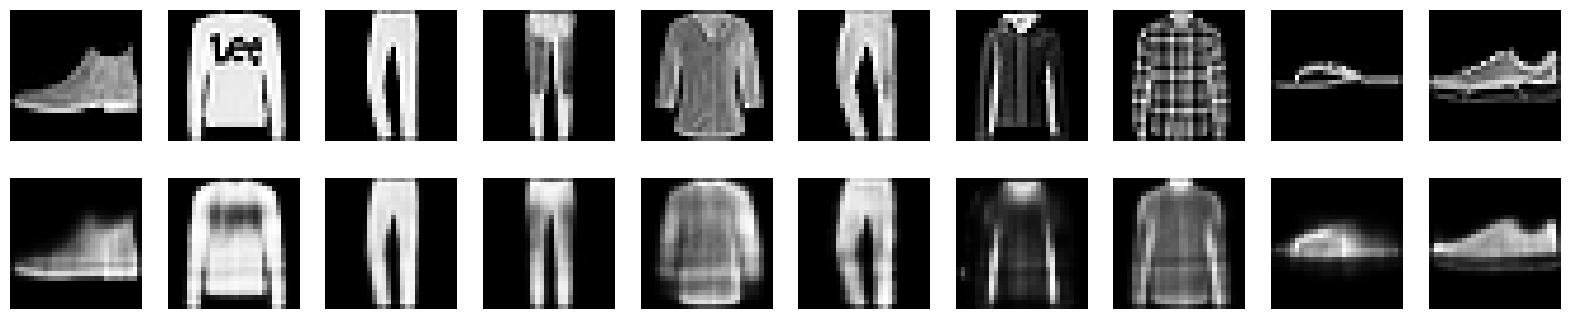

In [ ]:
decoded_imgs = autoencoder.predict(x_test_flat)
print(((decoded_imgs-x_test_flat)**2).sum())
f(decoded_imgs)

### Applications of Sparse Autoencoders

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
214119.92


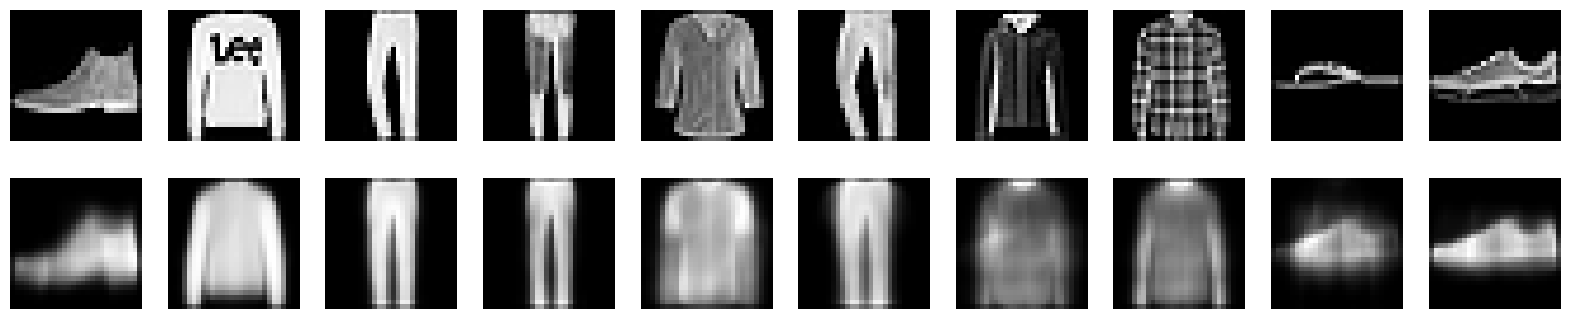

In [ ]:
decoded_imgs = sparse_autoencoder.predict(x_test_flat)
print(((decoded_imgs-x_test_flat)**2).sum())
f(decoded_imgs)

### Denoising Autoencoders

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
152157.81


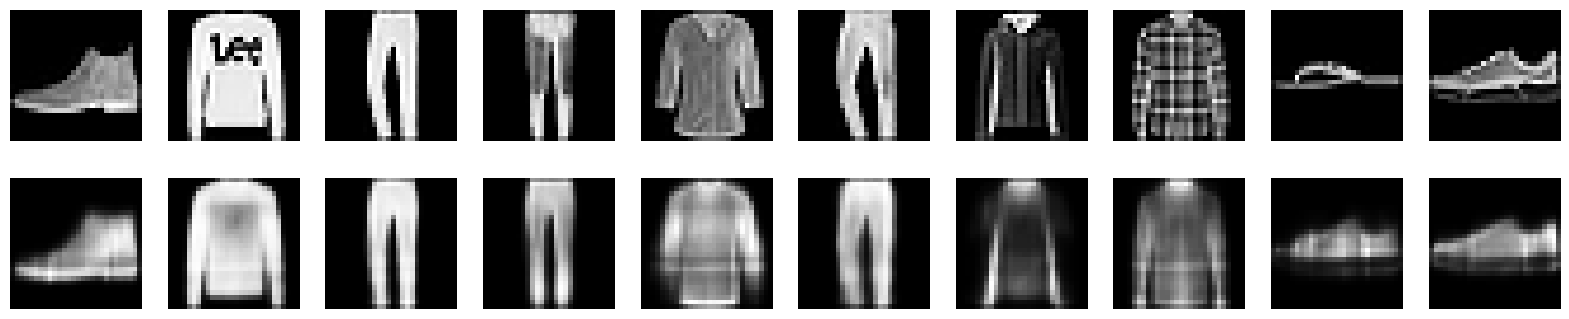

In [ ]:
decoded_imgs = denoising_autoencoder.predict(x_test_noisy)
print(((decoded_imgs-x_test_flat)**2).sum())
f(decoded_imgs)

### Undercomplete Autoencoder

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
138230.95


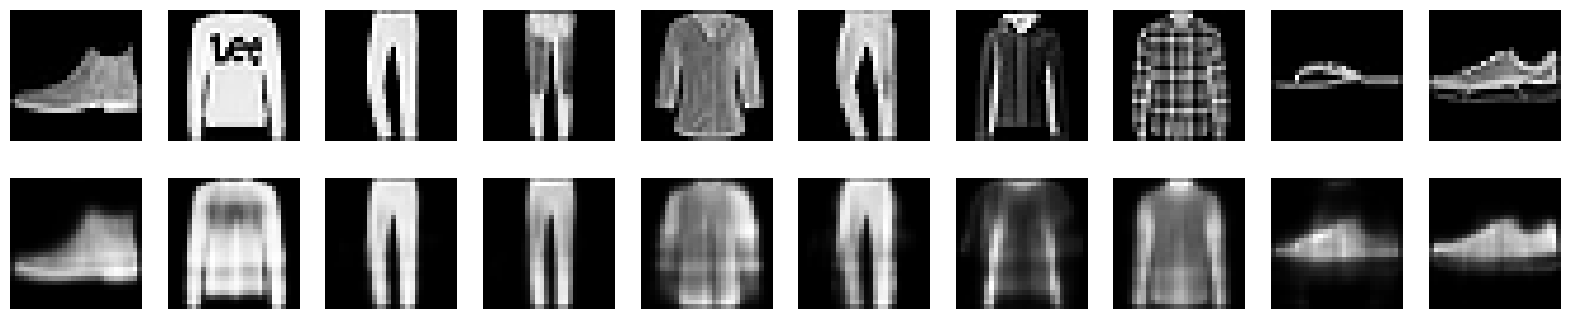

In [ ]:

decoded_imgs = undercomplete_autoencoder.predict(x_test_flat)
print(((decoded_imgs-x_test_flat)**2).sum())
f(decoded_imgs)


### Contractive Autoencoder

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
99656.39


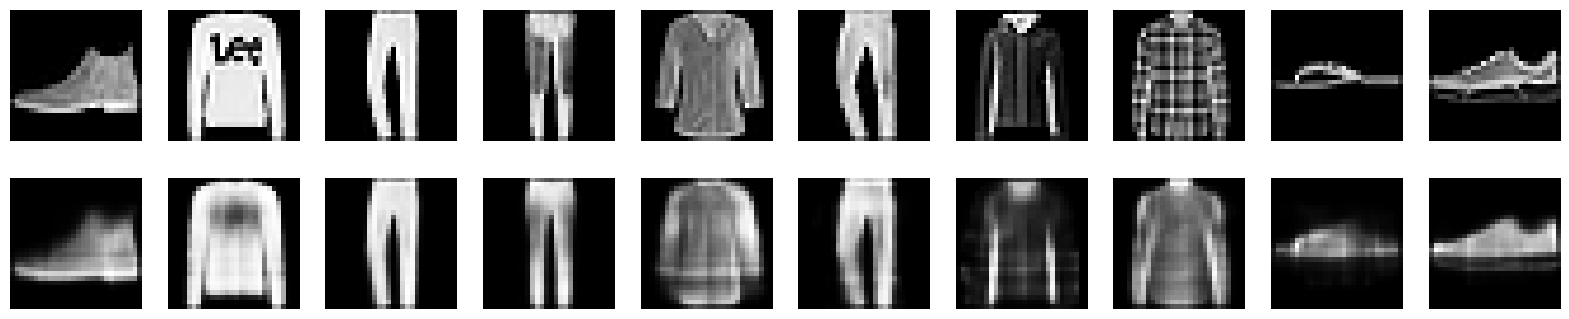

In [ ]:
decoded_imgs = contractive_autoencoder.predict(x_test_flat)
print(((decoded_imgs-x_test_flat)**2).sum())
f(decoded_imgs)

### Convolutional Autoencoder

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step
65902.95


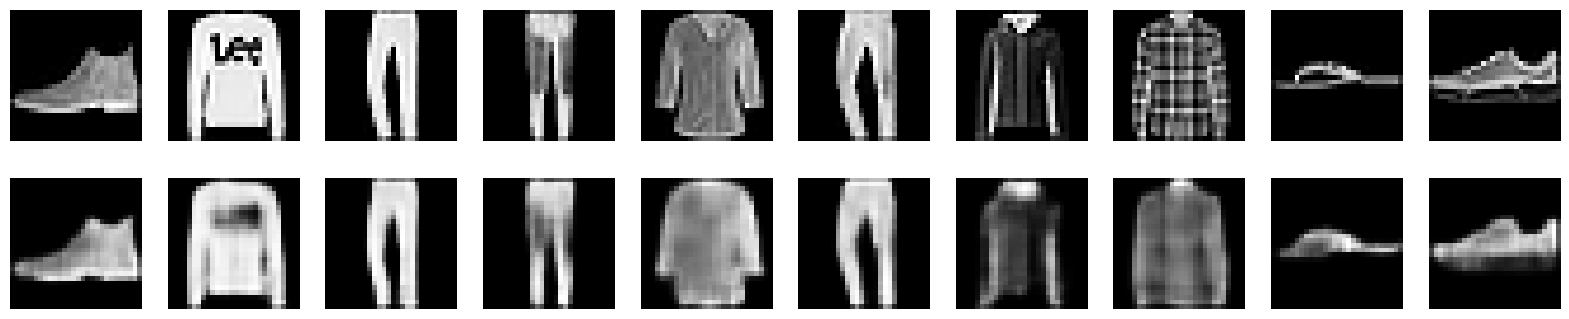

In [ ]:
decoded_imgs = conv_autoencoder.predict(x_test_cnn)
print(((decoded_imgs-x_test_cnn)**2).sum())
f(decoded_imgs)

### Variational Autoencoder

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
345755.8


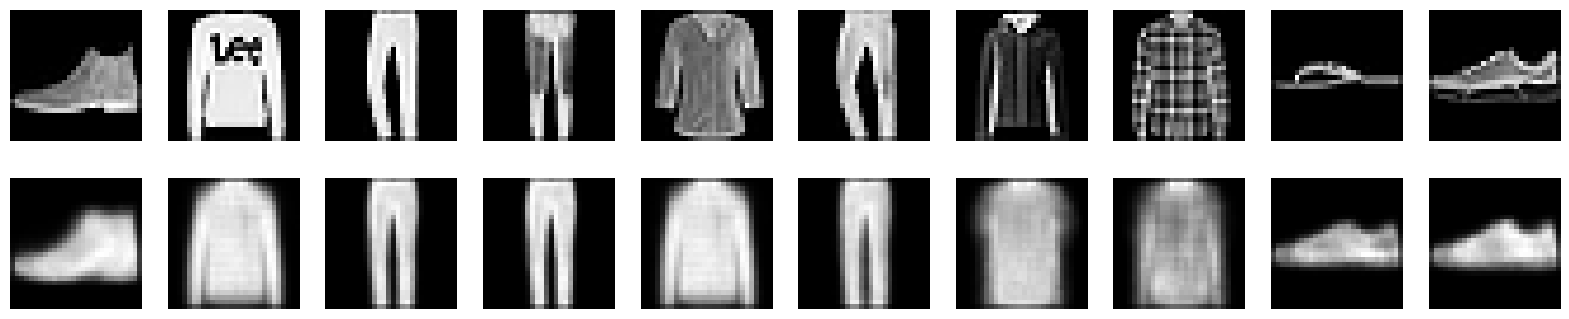

In [ ]:

decoded_imgs = vae.predict(x_test_cnn)
print(((decoded_imgs-x_test_cnn)**2).sum())
f(decoded_imgs)

## ВЫВОДЫ

Модели подтверждают то, что о них говорят.

Также можно заметить, что из-за своей сложной структуры Convolutional Autoencoder и Variational Autoencoder показали большое время обучения на меньшем количестве эпох, при том, что результаты не оправдыавают затраченное время. Предположительно это связано из-за слишком простой задачи для сложной структуры.

Простая ванильная реализация при этом, показала лучший результат на fachion mnist, быстрее всех обучилась, по той же причине.

Заключением можно сделать вывод, что даже простая реализация может быть лучшей в зависимости от сложности задачи.
